## **THE UNITED STATES RESIDENTIAL HOUSING MARKET**

*Shreyas Bangera*

### **Introduction**

This notebook aims to explore data pertaining to the US Residential Housing Market and potential factors that could influence it. The data, collected from the Federal Reserve Bank of St. Louis through their [website](https://fred.stlouisfed.org/), is till 2023-Q1 measured quarterly.

An article published by [Investopedia](https://www.investopedia.com/articles/mortages-real-estate/11/factors-affecting-real-estate-market.asp) explains how key factors like demographics, interest rates, the economy, and government policies drive the Real Estate Market. These factors have been widely recognized as significant drivers of housing market dynamics, impacting housing demand, prices, and overall market conditions.

As a part of my assignment, I wanted to delve deeper into these factors and explore correlations that could further support the claims made in the article. By analyzing the relationships between these factors and residential housing prices, I aim to strengthen the MECE (Mutually Exclusive, Collectively Exhaustive) framework that will be designed to understand the US Residential Housing Market.

By conducting statistical analysis on the collected data and examining correlations, this notebook seeks to provide insights into the relationships between the identified factors and residential housing prices, contributing to a better understanding of the dynamics driving the US housing market.

**Dependent Variable**
1. Median Sales Price

**Independent Variables**
1. Demographics (Population)
2. Economy (GDP, Median Household Income, Employment Level)
3. Interest Rate (Mortgage Rate)

### **Table of Contents**
- **Median Sales Price of houses in the United States (1963 - 2023)**
- **Correlation between GDP and Housing Prices (factor: Economy)**
- **Employment Level and Housing Prices (factor: Economy)**
- **Median Household Income and Housing Prices (factor: Economy)**
- **Mortgage Rate vs Housing Prices (factor: Interest Rate)**
- **Population vs Housing Price (factor: Demographics)**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
# Load all datasets

price_org = pd.read_csv("data/median_sales_price.csv")
"""
U.S. Census Bureau and U.S. Department of Housing and Urban Development, Median Sales Price of Houses Sold for the United States [MSPUS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MSPUS, June 12, 2023.
(EDIT GRAPH ⚙ -> Quarterly)
"""

gdp_org = pd.read_csv("data/GDP.csv")
"""
U.S. Bureau of Economic Analysis, Gross Domestic Product [GDP], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDP, June 12, 2023.
(EDIT GRAPH ⚙ -> Quarterly)
"""

employment_org = pd.read_csv("data/employment_level.csv")
"""
U.S. Bureau of Labor Statistics, Employment Level [CE16OV], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CE16OV, June 12, 2023.
(EDIT GRAPH ⚙ -> Quarterly, End of Period)
"""

income_org = pd.read_csv("data/median_household_income.csv")
"""
U.S. Census Bureau, Median Household Income in the United States [MEHOINUSA646N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MEHOINUSA646N, June 13, 2023.
(EDIT GRAPH ⚙ -> Annual)
"""

interest_org = pd.read_csv("data/mortgage_rate.csv")
"""
Freddie Mac, 30-Year Fixed Rate Mortgage Average in the United States [MORTGAGE30US], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MORTGAGE30US, June 15, 2023.
(EDIT GRAPH ⚙ -> Quarterly, Average)
"""

population_org = pd.read_csv("data/POPTHM.csv")
"""
U.S. Bureau of Economic Analysis, Population [POPTHM], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/POPTHM, June 13, 2023.
(EDIT GRAPH ⚙ -> Quarterly, End of Period)
"""
None

### **Median Sales Price of houses in the United States (1963 - 2023)**

In [3]:
price_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    241 non-null    object 
 1   MSPUS   241 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [4]:
price_org['DATE'] = pd.to_datetime(price_org['DATE'])
price_org

,DATE,MSPUS
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0
...,...,...
236,2022-01-01,433100.0
237,2022-04-01,449300.0
238,2022-07-01,468000.0
239,2022-10-01,479500.0


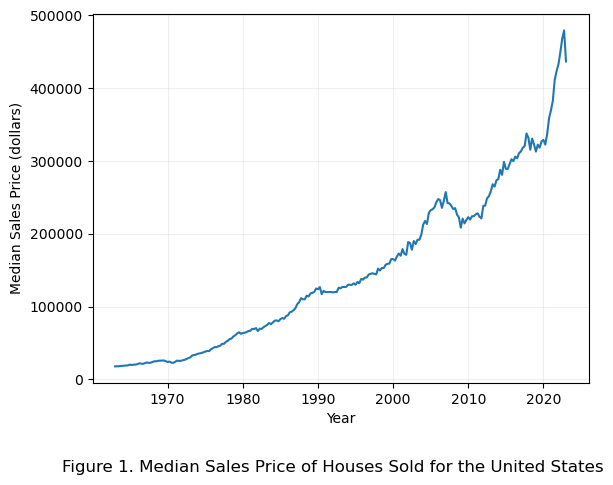

In [5]:
sns.lineplot(x='DATE', y='MSPUS', data=price_org)
plt.xlabel('Year')
plt.ylabel('Median Sales Price (dollars)')
plt.suptitle("Figure 1. Median Sales Price of Houses Sold for the United States", y=-0.05)
plt.grid(alpha=0.2)
plt.show()

### **Correlation between GDP and Housing Prices (factor: Economy)**

In [6]:
gdp = gdp_org.copy(deep=True)
gdp

,DATE,GDP
0,1963-01-01,621.672
1,1963-04-01,629.752
2,1963-07-01,644.444
3,1963-10-01,653.938
4,1964-01-01,669.822
...,...,...
236,2022-01-01,24740.480
237,2022-04-01,25248.476
238,2022-07-01,25723.941
239,2022-10-01,26137.992


In [7]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    241 non-null    object 
 1   GDP     241 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [8]:
gdp['DATE'] = pd.to_datetime(gdp['DATE'])
gdp.head(5)

,DATE,GDP
0,1963-01-01,621.672
1,1963-04-01,629.752
2,1963-07-01,644.444
3,1963-10-01,653.938
4,1964-01-01,669.822


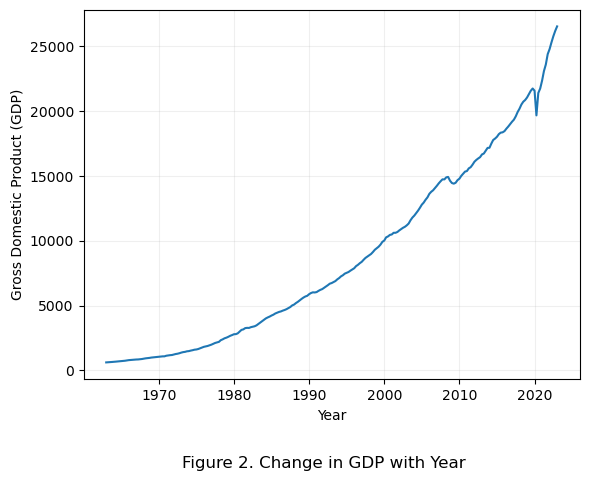

In [9]:
sns.lineplot(x='DATE', y='GDP', data=gdp)
plt.xlabel('Year')
plt.ylabel('Gross Domestic Product (GDP)')
plt.suptitle("Figure 2. Change in GDP with Year", y=-0.05)
plt.grid(alpha=0.2)
plt.show()

In [10]:
price_gdp = price_org.copy(deep=True)
price_gdp

,DATE,MSPUS
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0
...,...,...
236,2022-01-01,433100.0
237,2022-04-01,449300.0
238,2022-07-01,468000.0
239,2022-10-01,479500.0


In [11]:
price_vs_gdp = price_gdp.merge(gdp, on='DATE')
price_vs_gdp

,DATE,MSPUS,GDP
0,1963-01-01,17800.0,621.672
1,1963-04-01,18000.0,629.752
2,1963-07-01,17900.0,644.444
3,1963-10-01,18500.0,653.938
4,1964-01-01,18500.0,669.822
...,...,...,...
236,2022-01-01,433100.0,24740.480
237,2022-04-01,449300.0,25248.476
238,2022-07-01,468000.0,25723.941
239,2022-10-01,479500.0,26137.992


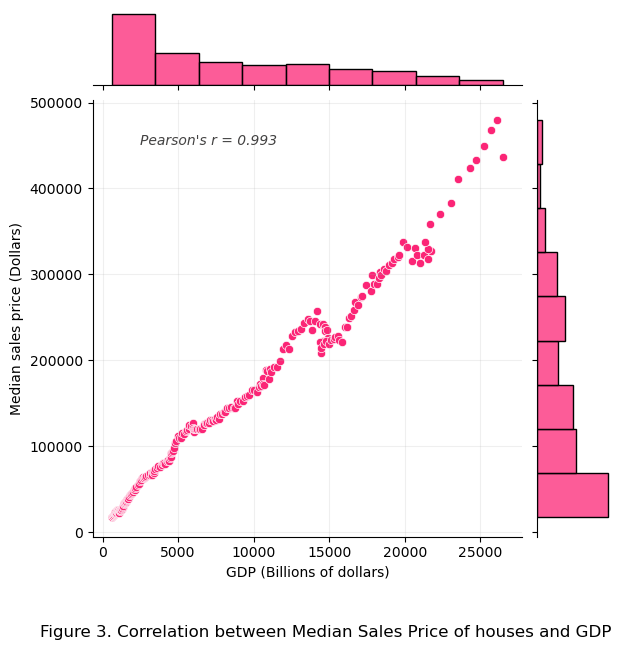

In [12]:
sns.jointplot(x='GDP', y='MSPUS', data=price_vs_gdp, kind="scatter", color="#FB2576")
plt.xlabel('GDP (Billions of dollars)')
plt.ylabel('Median sales price (Dollars)')
plt.suptitle("Figure 3. Correlation between Median Sales Price of houses and GDP", y=-0.05)
plt.text(
    2500, 450000, "Pearson's r = {}".format(
    round(np.corrcoef(price_vs_gdp['GDP'], price_vs_gdp['MSPUS'])[0][1], 3)
    ),
    fontdict={'fontstyle':'italic', 'color':'#434242'}
)
plt.grid(alpha=0.2)
plt.show()

In [13]:
price_vs_gdp[['MSPUS', 'GDP']].corr()

,MSPUS,GDP
MSPUS,1.000000,0.992972
GDP,0.992972,1.000000


### **Employment Level and Housing Prices (factor: Economy)**

In [14]:
emp = employment_org.copy(deep=True)
emp

,DATE,CE16OV
0,1948-01-01,57671
1,1948-04-01,58743
2,1948-07-01,58513
3,1948-10-01,58740
4,1949-01-01,58043
...,...,...
297,2022-04-01,158057
298,2022-07-01,158850
299,2022-10-01,159244
300,2023-01-01,160892


In [15]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    302 non-null    object
 1   CE16OV  302 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [16]:
def is_numeric(val):
    """
    A function to check if a string can be converted to a number.
    """
    try:
        float(val)
    except ValueError:
        return val

In [17]:
placeholders = emp['CE16OV'].apply(is_numeric)
placeholders.unique()

array([None, '.'], dtype=object)

In [18]:
emp.replace('.', np.nan, inplace=True)
emp.dropna(how='any', inplace=True)
emp

,DATE,CE16OV
0,1948-01-01,57671
1,1948-04-01,58743
2,1948-07-01,58513
3,1948-10-01,58740
4,1949-01-01,58043
...,...,...
296,2022-01-01,158328
297,2022-04-01,158057
298,2022-07-01,158850
299,2022-10-01,159244


In [19]:
emp['DATE'] = pd.to_datetime(emp['DATE'])
emp['CE16OV'] = emp['CE16OV'].astype(float)
emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 300
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    301 non-null    datetime64[ns]
 1   CE16OV  301 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.1 KB


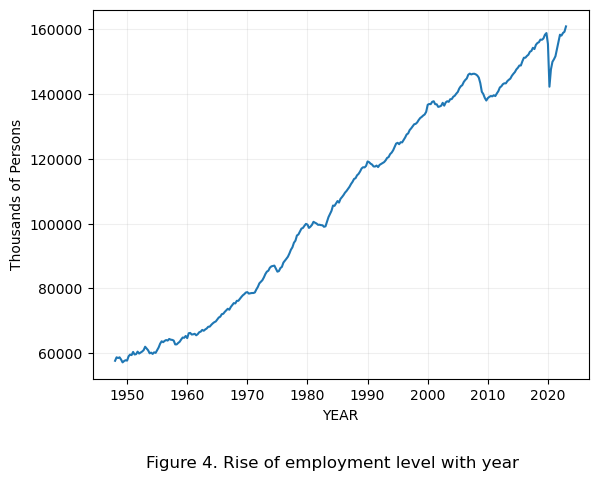

In [20]:
sns.lineplot(x='DATE', y='CE16OV', data=emp)
plt.xlabel('YEAR')
plt.ylabel('Thousands of Persons')
plt.suptitle("Figure 4. Rise of employment level with year", y=-0.05)
plt.grid(alpha=0.2)
plt.show()

In [21]:
price_emp = price_org.copy(deep=True)
price_emp

,DATE,MSPUS
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0
...,...,...
236,2022-01-01,433100.0
237,2022-04-01,449300.0
238,2022-07-01,468000.0
239,2022-10-01,479500.0


In [22]:
price_vs_emp = price_emp.merge(emp, how='left')
price_vs_emp

,DATE,MSPUS,CE16OV
0,1963-01-01,17800.0,67351.0
1,1963-04-01,18000.0,67649.0
2,1963-07-01,17900.0,68174.0
3,1963-10-01,18500.0,68213.0
4,1964-01-01,18500.0,68763.0
...,...,...,...
236,2022-01-01,433100.0,158328.0
237,2022-04-01,449300.0,158057.0
238,2022-07-01,468000.0,158850.0
239,2022-10-01,479500.0,159244.0


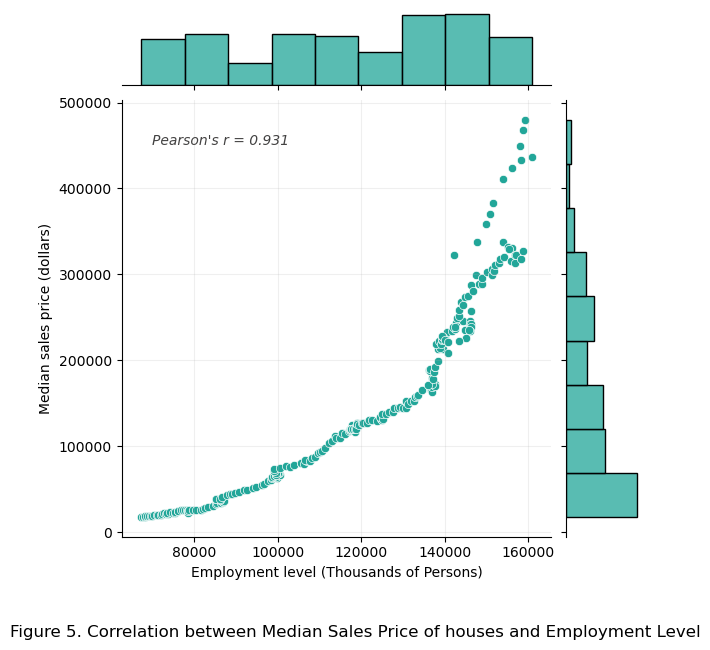

In [23]:
sns.jointplot(x='CE16OV', y='MSPUS', data=price_vs_emp, kind='scatter', color='#22A699')
plt.xlabel('Employment level (Thousands of Persons)')
plt.ylabel('Median sales price (dollars)')
plt.suptitle("Figure 5. Correlation between Median Sales Price of houses and Employment Level", y=-0.05)
plt.text(
    70000, 450000, "Pearson's r = {}".format(
    round(np.corrcoef(price_vs_emp['CE16OV'], price_vs_emp['MSPUS'])[0][1], 3)
    ),
    fontdict={'fontstyle':'italic', 'color':'#434242'}
)
plt.grid(alpha=0.2)
plt.show()

In [24]:
price_vs_emp[['MSPUS', 'CE16OV']].corr()

,MSPUS,CE16OV
MSPUS,1.000000,0.931032
CE16OV,0.931032,1.000000


### **Median Household Income and Housing Prices (factor: Economy)**

In [25]:
income = income_org.copy(deep=True)
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DATE           38 non-null     object
 1   MEHOINUSA672N  38 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 736.0+ bytes


In [26]:
income['DATE'] = pd.to_datetime(income['DATE'])
income.head()

,DATE,MEHOINUSA672N
0,1984-01-01,55828
1,1985-01-01,56871
2,1986-01-01,58920
3,1987-01-01,59624
4,1988-01-01,60115


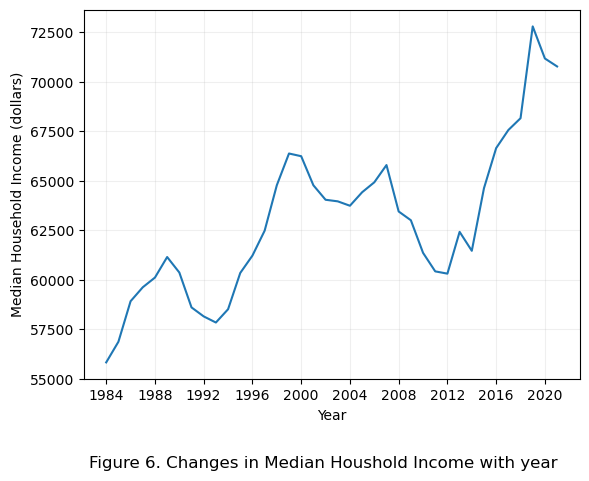

In [27]:
sns.lineplot(x='DATE', y='MEHOINUSA672N', data=income)
plt.xlabel('Year')
plt.ylabel('Median Household Income (dollars)')
plt.suptitle("Figure 6. Changes in Median Houshold Income with year", y=-0.05)
plt.grid(alpha=0.2)
plt.show()

In [28]:
price_inc = price_org.copy(deep=True)
price_vs_inc = price_inc.merge(income, how='right')
price_vs_inc.head()

,DATE,MSPUS,MEHOINUSA672N
0,1984-01-01,78200.0,55828
1,1985-01-01,82800.0,56871
2,1986-01-01,88000.0,58920
3,1987-01-01,97900.0,59624
4,1988-01-01,110000.0,60115


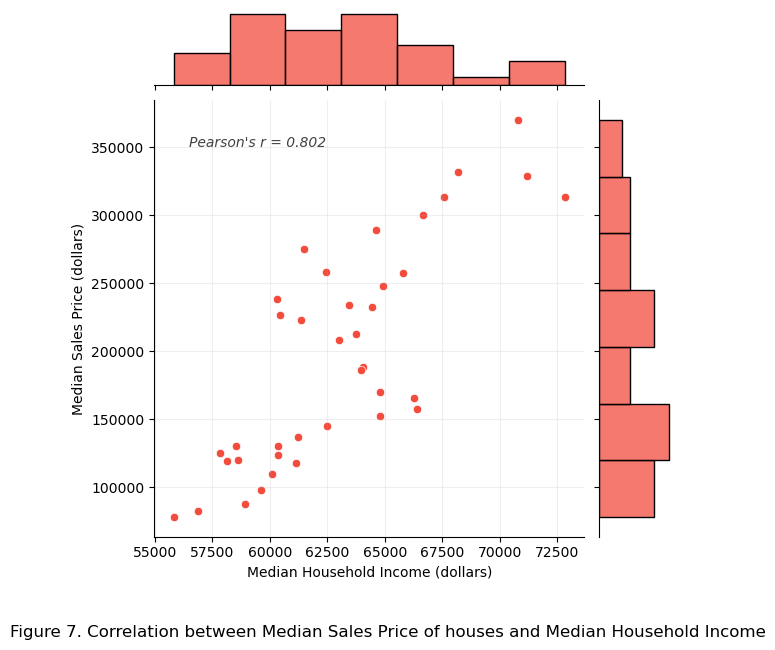

In [29]:
sns.jointplot(x='MEHOINUSA672N', y='MSPUS', data=price_vs_inc, kind='scatter', color='#F24C3D')
plt.xlabel('Median Household Income (dollars)')
plt.ylabel('Median Sales Price (dollars)')
plt.suptitle("Figure 7. Correlation between Median Sales Price of houses and Median Household Income", y=-0.05)
plt.text(
    56500, 350000, "Pearson's r = {}".format(
    round(np.corrcoef(price_vs_inc['MEHOINUSA672N'], price_vs_inc['MSPUS'])[0][1], 3)
    ),
    fontdict={'fontstyle':'italic', 'color':'#434242'}
)
plt.grid(alpha=0.2)
plt.show()

In [30]:
price_vs_inc[['MSPUS', 'MEHOINUSA672N']].corr()

,MSPUS,MEHOINUSA672N
MSPUS,1.000000,0.801644
MEHOINUSA672N,0.801644,1.000000


### **Mortgage Rate vs Housing Prices (factor: Interest Rate)**

In [31]:
interest = interest_org.copy(deep=True)
interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          209 non-null    object 
 1   MORTGAGE30US  209 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [32]:
interest['DATE'] = pd.to_datetime(interest['DATE'])
interest

,DATE,MORTGAGE30US
0,1971-04-01,7.413077
1,1971-07-01,7.658462
2,1971-10-01,7.552857
3,1972-01-01,7.349231
4,1972-04-01,7.346923
...,...,...
204,2022-04-01,5.266154
205,2022-07-01,5.623077
206,2022-10-01,6.664615
207,2023-01-01,6.372308


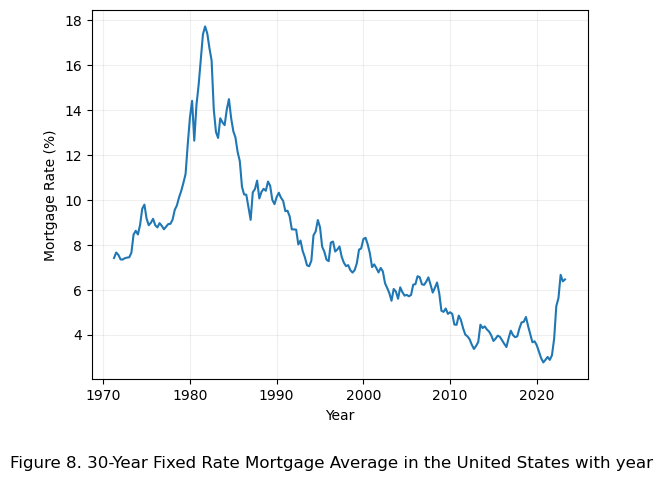

In [33]:
sns.lineplot(x='DATE', y='MORTGAGE30US', data=interest)
plt.xlabel('Year')
plt.ylabel('Mortgage Rate (%)')
plt.suptitle("Figure 8. 30-Year Fixed Rate Mortgage Average in the United States with year", y=-0.05)
plt.grid(alpha=0.2)
plt.show()

In [34]:
price_int = price_org.copy(deep=True)
price_vs_int = price_int.merge(interest, how='inner')
price_vs_int

,DATE,MSPUS,MORTGAGE30US
0,1971-04-01,25800.0,7.413077
1,1971-07-01,25300.0,7.658462
2,1971-10-01,25500.0,7.552857
3,1972-01-01,26200.0,7.349231
4,1972-04-01,26800.0,7.346923
...,...,...,...
203,2022-01-01,433100.0,3.822308
204,2022-04-01,449300.0,5.266154
205,2022-07-01,468000.0,5.623077
206,2022-10-01,479500.0,6.664615


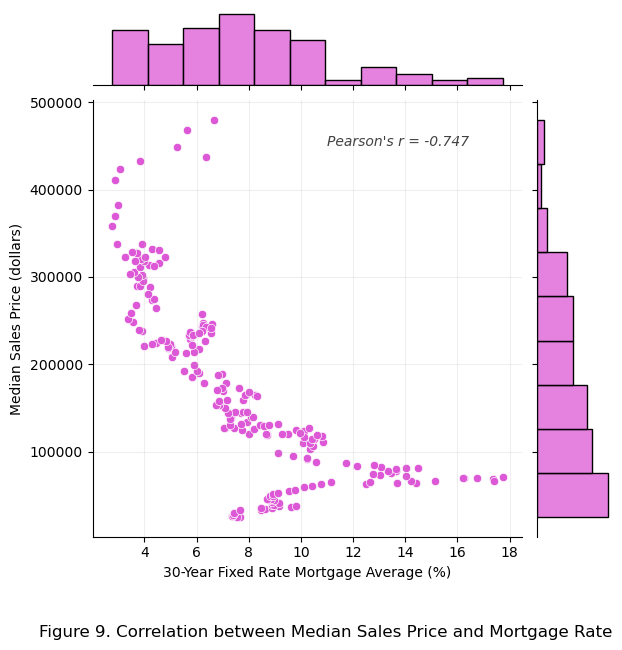

In [35]:
sns.jointplot(x='MORTGAGE30US', y='MSPUS', data=price_vs_int, kind='scatter', color='#DD58D6')
plt.xlabel('30-Year Fixed Rate Mortgage Average (%)')
plt.ylabel('Median Sales Price (dollars)')
plt.suptitle("Figure 9. Correlation between Median Sales Price and Mortgage Rate", y=-0.05)
plt.text(
    11, 450000, "Pearson's r = {}".format(
    round(np.corrcoef(price_vs_int['MORTGAGE30US'], price_vs_int['MSPUS'])[0][1], 3)
    ),
    fontdict={'fontstyle':'italic', 'color':'#434242'}
)
plt.grid(alpha=0.2)
plt.show()

In [36]:
price_vs_int[['MSPUS', 'MORTGAGE30US']].corr()

,MSPUS,MORTGAGE30US
MSPUS,1.000000,-0.747357
MORTGAGE30US,-0.747357,1.000000


### **Population vs Housing Price (factor: Demographics)**

In [37]:
population = population_org.copy(deep=True)
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    258 non-null    object
 1   POPTHM  258 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [38]:
population['DATE'] = pd.to_datetime(population['DATE'])

In [39]:
placeholder = population['POPTHM'].apply(is_numeric)
placeholder.unique()

array([None, '.'], dtype=object)

In [40]:
population['POPTHM'].replace('.', np.nan, inplace=True)
population.dropna(how='any', inplace=True)
population['POPTHM'] = population['POPTHM'].astype(float)
population

,DATE,POPTHM
0,1959-01-01,176274.0
1,1959-04-01,176954.0
2,1959-07-01,177755.0
3,1959-10-01,178504.0
4,1960-01-01,179707.0
...,...,...
252,2022-01-01,333056.0
253,2022-04-01,333460.0
254,2022-07-01,333976.0
255,2022-10-01,334420.0


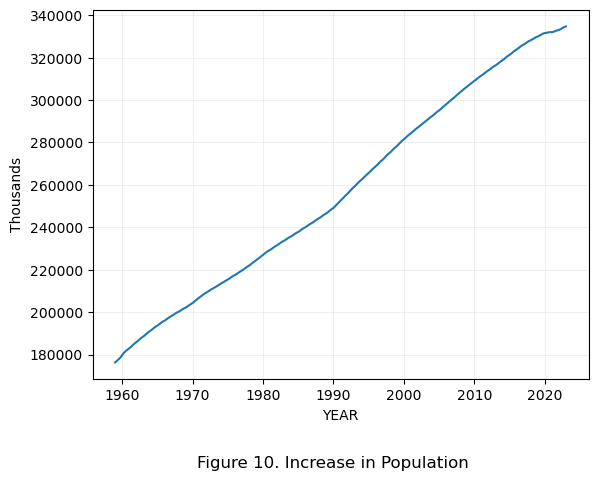

In [41]:
sns.lineplot(x='DATE', y='POPTHM', data=population)
plt.xlabel('YEAR')
plt.ylabel('Thousands')
plt.suptitle("Figure 10. Increase in Population", y=-0.05)
plt.grid(alpha=0.2)
plt.show()

In [42]:
price_pop = price_org.copy(deep=True)
price_vs_pop = price_pop.merge(population, how='inner')
price_vs_pop

,DATE,MSPUS,POPTHM
0,1963-01-01,17800.0,188484.0
1,1963-04-01,18000.0,189130.0
2,1963-07-01,17900.0,189895.0
3,1963-10-01,18500.0,190570.0
4,1964-01-01,18500.0,191146.0
...,...,...,...
236,2022-01-01,433100.0,333056.0
237,2022-04-01,449300.0,333460.0
238,2022-07-01,468000.0,333976.0
239,2022-10-01,479500.0,334420.0


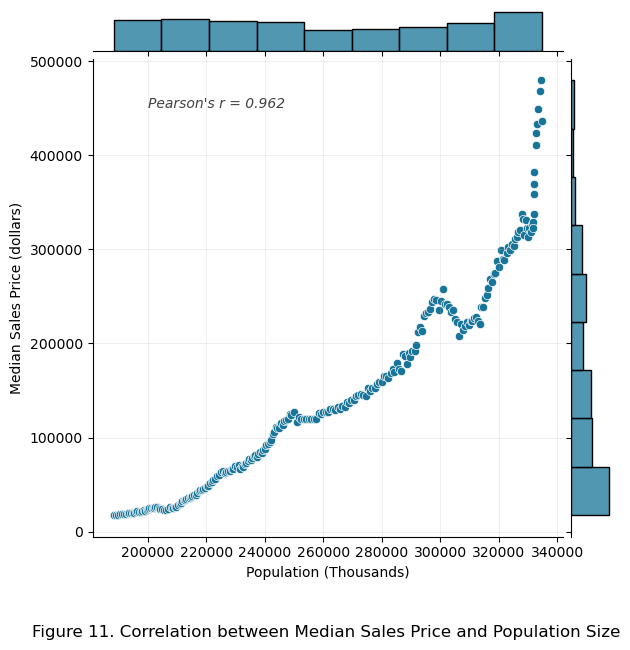

In [44]:
sns.jointplot(x='POPTHM', y='MSPUS', data=price_vs_pop, kind='scatter', color='#187498', ratio=10)
plt.xlabel('Population (Thousands)')
plt.ylabel('Median Sales Price (dollars)')
plt.suptitle("Figure 11. Correlation between Median Sales Price and Population Size", y=-0.05)
plt.text(
    200000, 450000, "Pearson's r = {}".format(
    round(np.corrcoef(price_vs_pop['POPTHM'], price_vs_pop['MSPUS'])[0][1], 3)
    ),
    fontdict={'fontstyle':'italic', 'color':'#434242'}
)
plt.grid(alpha=0.2)
plt.show()

In [45]:
price_vs_pop[['MSPUS', 'POPTHM']].corr()

,MSPUS,POPTHM
MSPUS,1.00000,0.96233
POPTHM,0.96233,1.00000


### **Summary**

|Factor|Variable 1|Variable 2|Pearson Correlation coefficient|
|:-|:-|:-|:-:|
|Economy|GDP|Median Sales Price|0.9929|
|Economy|Employment Level|Median Sales Price|0.9310|
|Economy|Median Houshold Income|Median Sales Price|0.8016|
|Interest Rate|Mortgage Rate|Median Sales Price|-0.7473|
|Demography|Population Size|Median Sales Price|0.9623|

### **References**

1. https://www.investopedia.com/articles/mortages-real-estate/11/factors-affecting-real-estate-market.asp

2. U.S. Census Bureau and U.S. Department of Housing and Urban Development, Median Sales Price of Houses Sold for the United States [MSPUS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MSPUS, June 12, 2023.

3. U.S. Bureau of Economic Analysis, Gross Domestic Product [GDP], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDP, June 12, 2023.

4. U.S. Bureau of Labor Statistics, Employment Level [CE16OV], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CE16OV, June 12, 2023.

5. U.S. Census Bureau, Median Household Income in the United States [MEHOINUSA646N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MEHOINUSA646N, June 13, 2023.

6. Freddie Mac, 30-Year Fixed Rate Mortgage Average in the United States [MORTGAGE30US], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MORTGAGE30US, June 15, 2023.

7. U.S. Bureau of Economic Analysis, Population [POPTHM], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/POPTHM, June 13, 2023.